In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("customer_behavior.csv")
df

,Customer_Region,Age_Group,Prefers_Online_Shopping,Has_Loyalty_Card,Buys_On_Discount,Visits_Store_Frequency,Customer_Satisfaction,Preferred_Payment_Method,Recommends_To_Friends,Responds_To_Offers,Active_Customer
0,North,18-25,No,Yes,Yes,Rarely,Very Satisfied,Debit Card,No,No,No
1,Central,46-60,No,Yes,Yes,Sometimes,Satisfied,Credit Card,Yes,Yes,No
2,South,26-35,Yes,Yes,No,Sometimes,Dissatisfied,Wallet,Yes,No,Yes
3,North,36-45,No,Yes,No,Sometimes,Satisfied,Cash,Yes,Yes,No
4,East,60+,No,Yes,No,Never,Very Satisfied,Debit Card,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
995,East,18-25,No,Yes,No,Rarely,Satisfied,UPI,Yes,No,Yes
996,North,60+,Yes,Yes,Yes,Never,Very Satisfied,UPI,Yes,Yes,Yes
997,Central,36-45,No,Yes,No,Never,Very Satisfied,Debit Card,No,Yes,Yes
998,West,36-45,Yes,No,Yes,Never,Dissatisfied,Wallet,Yes,No,No


In [3]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])
df

,Customer_Region,Age_Group,Prefers_Online_Shopping,Has_Loyalty_Card,Buys_On_Discount,Visits_Store_Frequency,Customer_Satisfaction,Preferred_Payment_Method,Recommends_To_Friends,Responds_To_Offers,Active_Customer
0,2,0,0,1,1,2,3,2,0,0,0
1,0,3,0,1,1,3,2,1,1,1,0
2,3,1,1,1,0,3,0,4,1,0,1
3,2,2,0,1,0,3,2,0,1,1,0
4,1,4,0,1,0,0,3,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,1,0,2,2,3,1,0,1
996,2,4,1,1,1,0,3,3,1,1,1
997,0,2,0,1,0,0,3,2,0,1,1
998,4,2,1,0,1,0,0,4,1,0,0


In [4]:
x=df.drop(columns="Active_Customer")
y=df["Active_Customer"]
y

0      0
1      0
2      1
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Active_Customer, Length: 1000, dtype: int64

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [6]:
model=BernoulliNB()
model.fit(x_train,y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"binarize binarize: float or None, default=0.0Threshold for binarizing (mapping to booleans) of sample features.If None, input is presumed to already consist of binary vectors.",0.0
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [7]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1])

In [8]:
accuracy=accuracy_score(y_test,y_pred)
print(f"accuracy:{accuracy*100:.2f}%")

accuracy:51.50%


In [9]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[72, 24],
       [73, 31]])

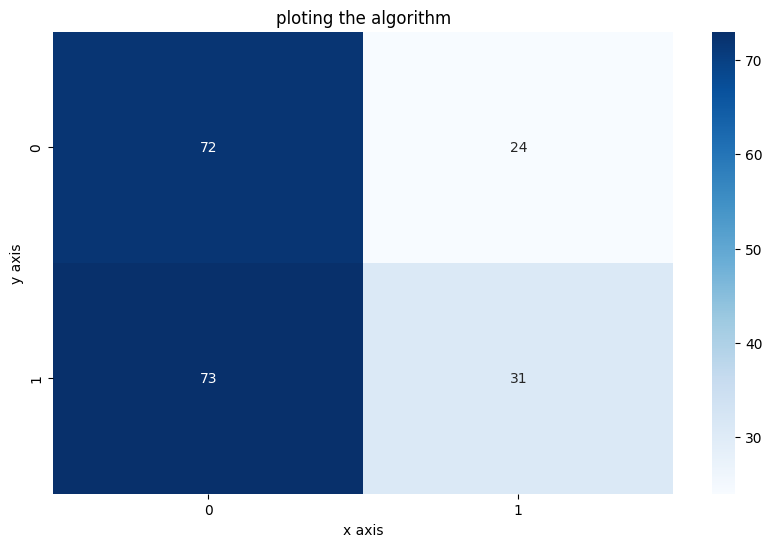

In [10]:
plt.figure(figsize=[10,6])
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",shading="flat",linecolor="m")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("ploting the algorithm")
plt.show()

In [11]:
new=pd.DataFrame({
    "Customer_Region":label.fit_transform(["Central"]),
    "Age_Group":[18-25],
    "Prefers_Online_Shopping":label.fit_transform(["No"]),
    "Has_Loyalty_Card":label.fit_transform(["Yes"]),
    "Buys_On_Discount":label.fit_transform(["Yes"]),
    "Visits_Store_Frequency":label.fit_transform(["Rarely"]),
    "Customer_Satisfaction":label.fit_transform(["Satisfied"]),
    "Preferred_Payment_Method":label.fit_transform(["Cash"]),
    "Recommends_To_Friends":label.fit_transform(["No"]),
    "Responds_To_Offers":label.fit_transform(["No"])

})
pre=model.predict(new)
pre

array([0])